In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import astropy.io.fits as fits
from astropy.table import Table
# import sncosmo
# import analyzeSN as ans

In [3]:
oldDir = '/Users/rbiswas/Downloads/ENIGMA_LSSTDEEP_Y1'
newDir = '/Users/rbiswas/Downloads/ENIGMA_LSSTDEEP_Y1_2016/'

In [4]:
fname = os.path.join(oldDir, 'LSST_Ia_HEAD.FITS')
hdulist = fits.open(fname)
data = hdulist[1].data
fname = os.path.join(newDir, 'LSST_Ia_HEAD.FITS')
head1 = pd.DataFrame(data)
hdulist = fits.open(fname)
data = hdulist[1].data
head2 = pd.DataFrame(data)

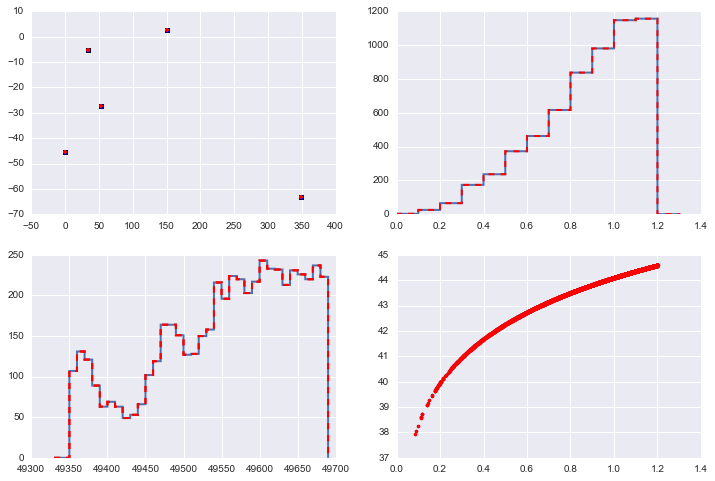

In [5]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax[0, 0].scatter(head1.RA, head1.DECL)
_ = ax[0, 1].hist(head1.REDSHIFT_FINAL, bins=np.arange(0., 1.4, 0.1), histtype='step', lw=2, alpha=1.)
_ = ax[1, 0].hist(head1.SIM_PEAKMJD, bins=np.arange(49330, 49700., 10.), histtype='step', lw=2., alpha=1.)
_ = ax[1, 1].plot(head1.REDSHIFT_FINAL, head1.SIM_DLMU, '.')
ax[0, 0].scatter(head2.RA, head2.DECL, marker='+', color='r' )
_ = ax[0, 1].hist(head2.REDSHIFT_FINAL, bins=np.arange(0., 1.4, 0.1), histtype='step', lw=2, alpha=1., color='r', ls='dashed')
_ = ax[1, 0].hist(head2.SIM_PEAKMJD, bins=np.arange(49330, 49700., 10.), histtype='step', lw=2., alpha=1., color='r',ls='dashed')
_ = ax[1, 1].plot(head2.REDSHIFT_FINAL, head2.SIM_DLMU, '.', color='r')
_ = ax[1, 0].hist(head2.SIM_PEAKMJD, bins=np.arange(49330, 49700., 10.), histtype='step', lw=2., alpha=1., color='r',ls='dashed')



/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


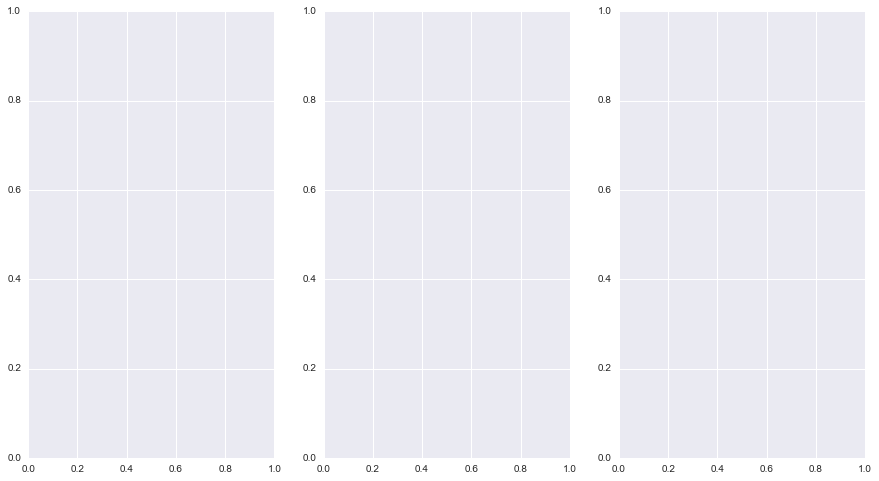

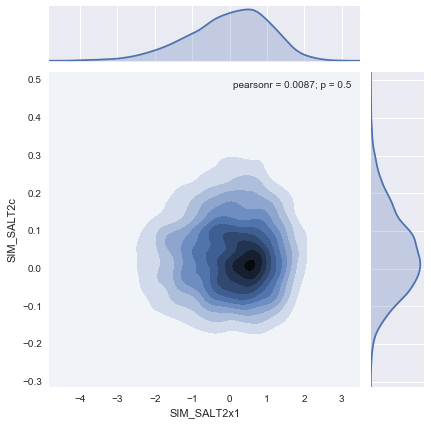

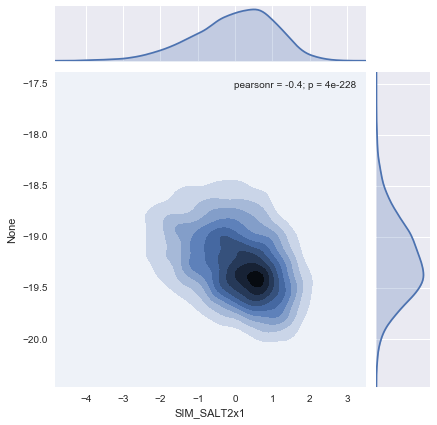

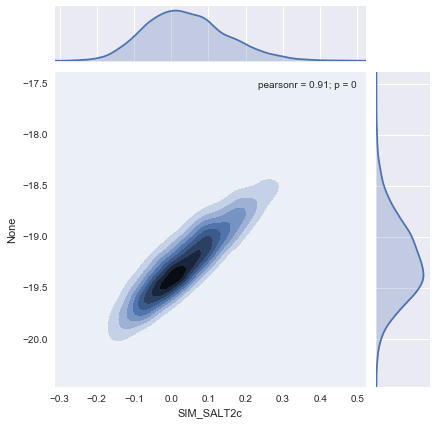

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15, 8))
sns.jointplot(head1.SIM_SALT2x1, head1.SIM_SALT2c, kind='kde')
sns.jointplot(head1.SIM_SALT2x1, head1.SIM_SALT2mB - head1.SIM_DLMU, kind='kde')
sns.jointplot(head1.SIM_SALT2c, head1.SIM_SALT2mB - head1.SIM_DLMU, kind='kde')

## Phot Files

In [7]:
fname = os.path.join(oldDir, 'LSST_Ia_PHOT.FITS')
data = Table.read(fname)
phot1 = data.to_pandas()
fname = os.path.join(newDir, 'LSST_Ia_PHOT.FITS')
data = Table.read(fname)
phot2 = data.to_pandas()

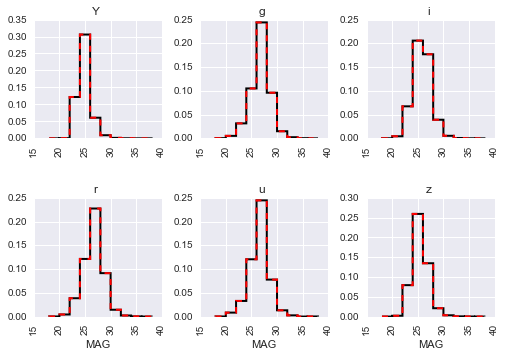

In [8]:
fig, ax = plt.subplots(2, 3)
_ = phot1.query('MAG > 15 and MAG < 50').hist('MAG', by='FLT', bins=np.arange(18, 40, 2), ax=ax,
                                          **{'histtype':'step', 
                                                                                         'normed':True, 
                                                                                         'lw':2,
                                                                                         #'ls': 'dashed',
                                                                                         'color':'k',
                                                                                          'alpha':1})
#ax[0,0].hist(phot1.query('FLT == "g "').MAG)
_ = phot2.query('MAG > 15 and MAG < 50').hist('MAG', by='FLT', bins=np.arange(18, 40, 2),ax=ax,
                                                                                        **{'histtype':'step', 
                                                                                         'normed':True, 
                                                                                         'lw':2,
                                                                                         'ls':'dashed',
                                                                                         'color':'r',
                                                                                          'alpha':1})
for axs in ax[-1]:
    axs.set_xlabel('MAG')

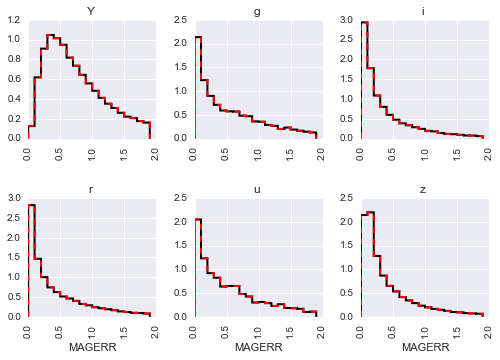

In [9]:
fig, ax = plt.subplots(2, 3)
_ = phot1.query('MAG > 15 and MAG < 50').hist('MAGERR', by='FLT', bins=np.arange(0., 2., 0.1), ax=ax,
                                          **{'histtype':'step', 
                                                                                         'normed':True, 
                                                                                         'lw':2,
                                                                                          #'log':True,
                                                                                         #'ls': 'dashed',
                                                                                         'color':'k',
                                                                                          'alpha':1})
#ax[0,0].hist(phot1.query('FLT == "g "').MAG)
_ = phot2.query('MAG > 15 and MAG < 50').hist('MAGERR', by='FLT', bins=np.arange(0., 2., 0.1),ax=ax,
                                                                                        **{'histtype':'step', 
                                                                                         'normed':True,
                                                                                          #'log':True,
                                                                                         'lw':2,
                                                                                         'ls':'dashed',
                                                                                         'color':'r',
                                                                                          'alpha':1})
for axs in ax[-1]:
    axs.set_xlabel('MAGERR')